In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Airline passangers

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

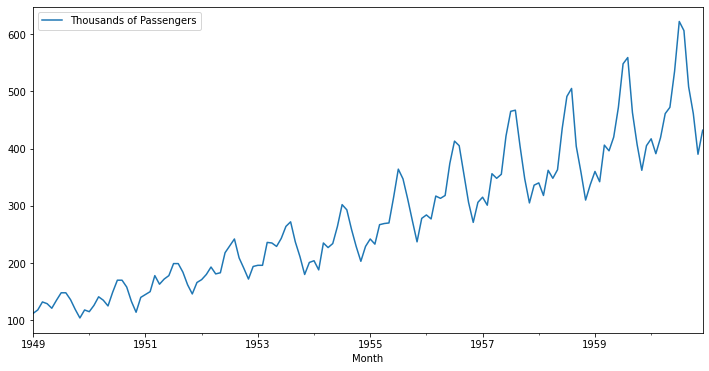

In [4]:
df.plot(figsize = (12, 6)).autoscale(axis = 'x', tight = True)

# Algeria Exports

In [5]:
draw = pd.read_csv('AlgeriaExport.txt', header = None)

In [6]:
draw.head()

,0
0,39.043173
1,46.244557
2,19.793873
3,24.684682
4,25.084059


In [7]:
index = pd.date_range(start = "1960", end = "2018", freq = "Y")
index

DatetimeIndex(['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31',
               '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31',
               '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31',
               '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31',
               '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
               '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
      

In [8]:
T = draw.set_index(index)
T.head()

,0
1960-12-31,39.043173
1961-12-31,46.244557
1962-12-31,19.793873
1963-12-31,24.684682
1964-12-31,25.084059


<AxesSubplot:>

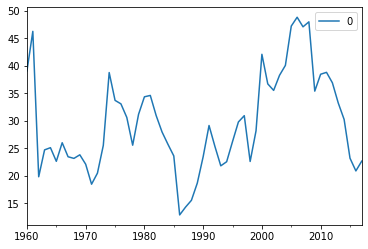

In [9]:
T.plot()

### fit 1

In [10]:
fit1 = SimpleExpSmoothing(T, initialization_method = "heuristic").fit(smoothing_level = 0.2, optimized = False)
fcast1 = fit1.forecast(3).rename(r"$\alpha = 0.2 $")

### fit 2

In [11]:
fit2 = SimpleExpSmoothing(T, initialization_method = "heuristic").fit(smoothing_level = 0.6, optimized = False)
fcast2 = fit2.forecast(3).rename(r"$\alpha = 0.6 $")

### fit 3

In [12]:
fit3 = SimpleExpSmoothing(T, initialization_method = "estimated").fit()
a = fit3.model.params["smoothing_level"]
fcast3 = fit3.forecast(3).rename(r"$\alpha = %s $" % a)

### Exponential smoothing

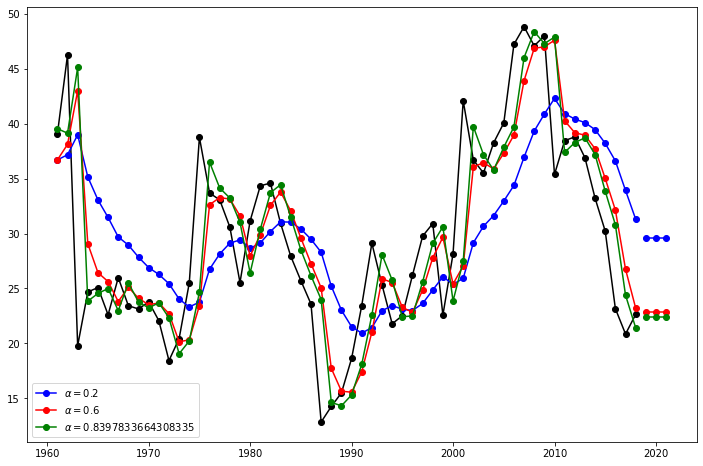

In [13]:
plt.figure(figsize = (12, 8))

#original data
plt.plot(T, marker = "o", color = "black")

#fit 1
plt.plot(fit1.fittedvalues, marker = "o", color = "blue")
(line1, ) = plt.plot(fcast1, marker = "o", color = "blue")

#fit 2
plt.plot(fit2.fittedvalues, marker = "o", color = "red")
(line2, ) = plt.plot(fcast2, marker = "o", color = "red")

#fit 3
plt.plot(fit3.fittedvalues, marker = "o", color = "green")
(line3, ) = plt.plot(fcast3, marker = "o", color = "green")

plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [15]:
T.to_pickle(path = "AlgerianExport.pkl")